In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [24]:
#Read the data
toyota = pd.read_csv("Toyota_Corolla.csv",encoding='cp1252')
toyota.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [25]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 106.6+ KB


In [26]:
#check for missing values
toyota.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# Correlation Matrix

In [27]:
toyota.corr()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


# Scatterplot between variables along with histograms

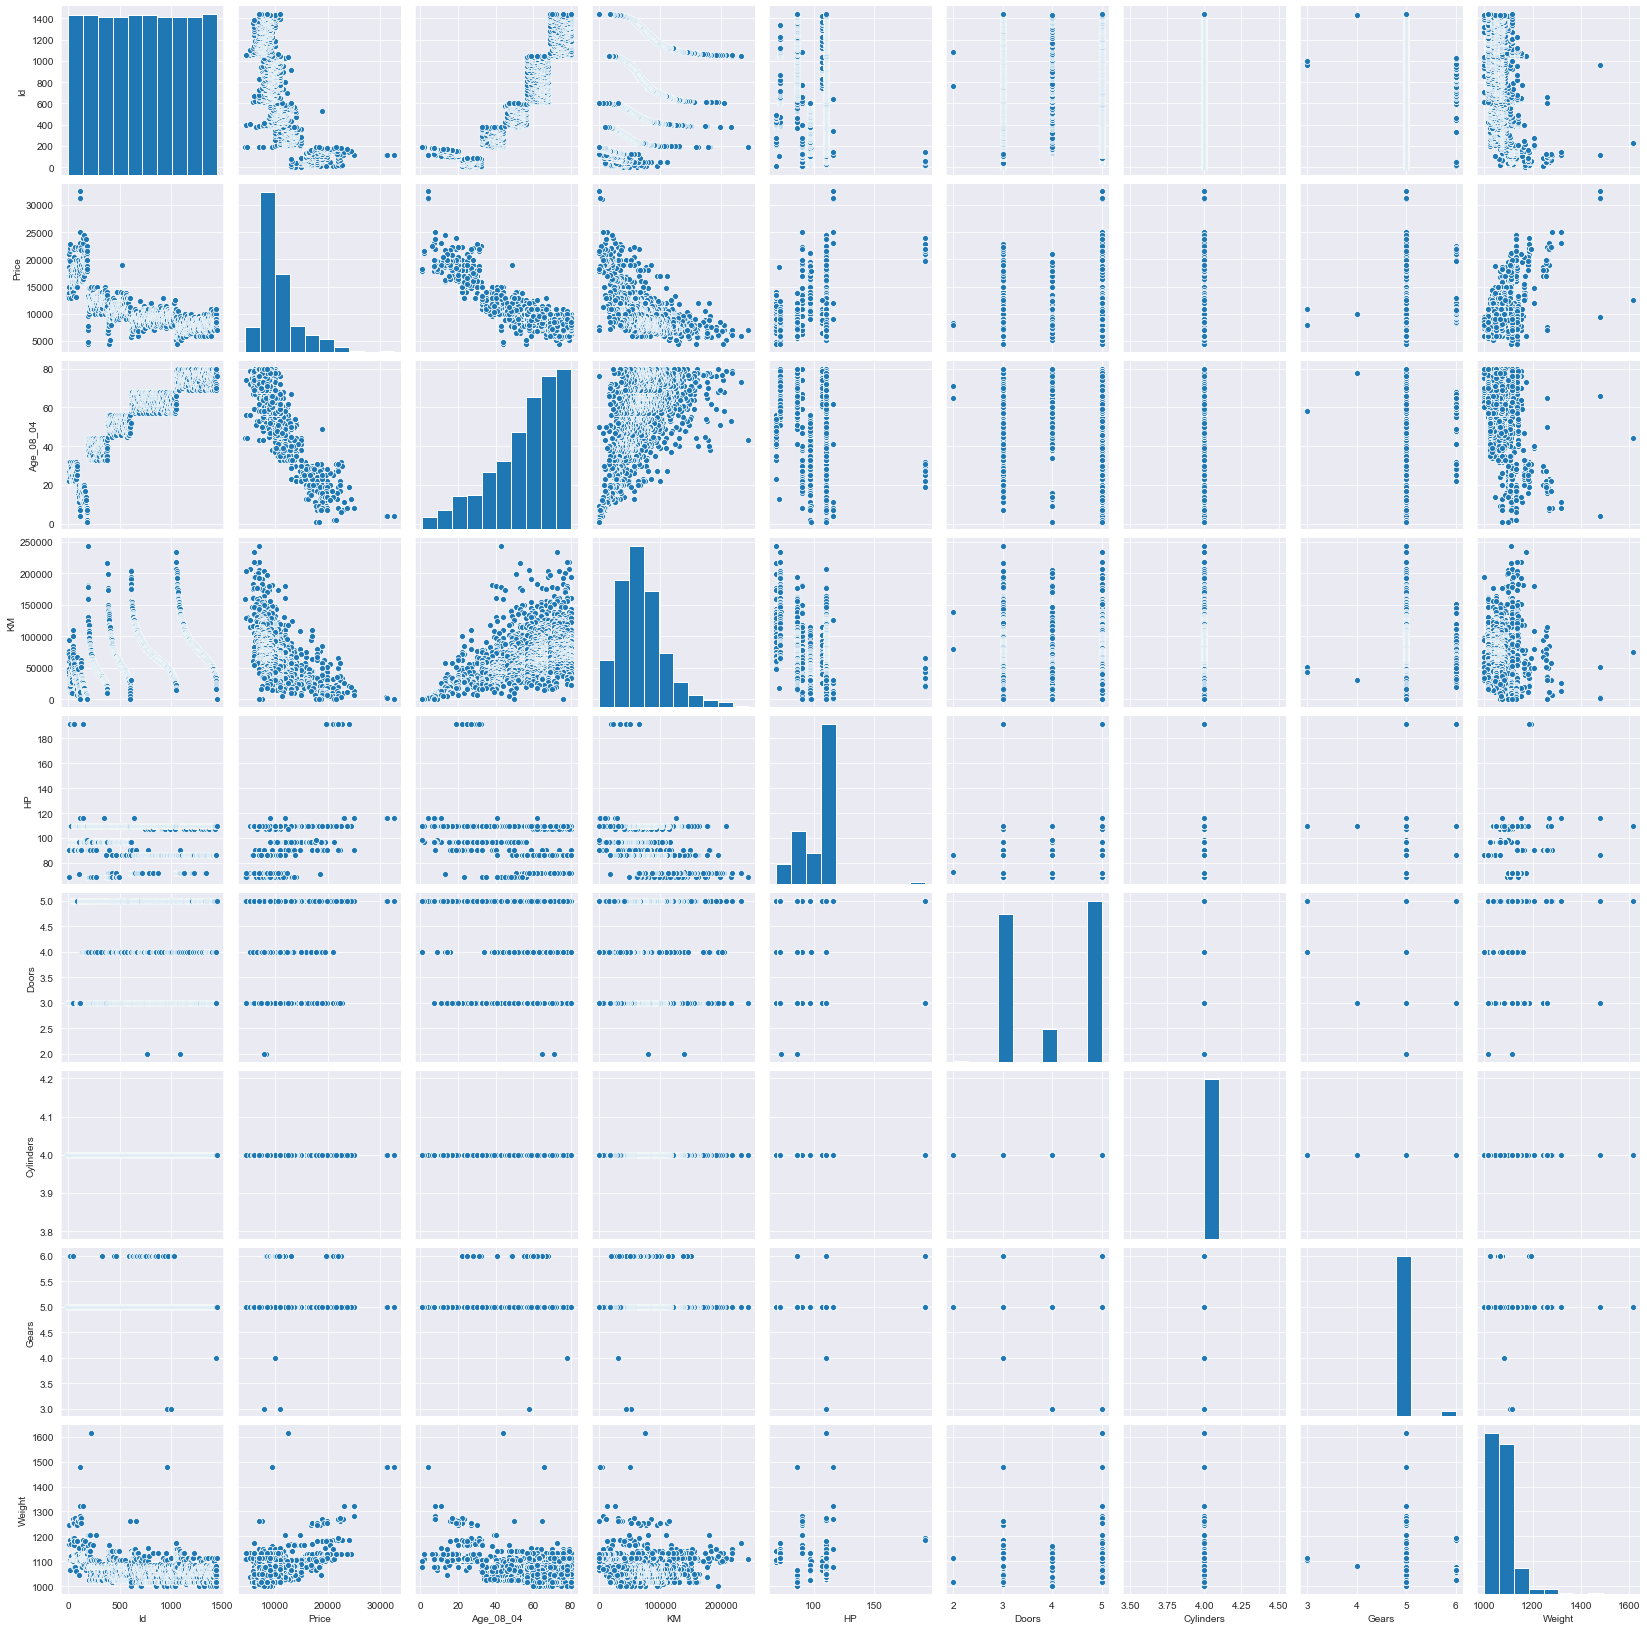

In [28]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

# Preparing a model

In [29]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+Weight+KM+HP+Cylinders+Doors+Gears+Id',data=toyota).fit()

In [30]:
#Coefficients
model.params

Intercept    -371.123046
Age_08_04    -142.870910
Weight         17.966373
KM             -0.017302
HP             29.197402
Cylinders   -1484.492183
Doors          -6.191827
Gears         676.746940
Id              0.845958
dtype: float64

In [31]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -4.776470
Age_08_04   -22.264281
Weight       21.242424
KM          -12.129019
HP           11.163165
Cylinders    -4.776470
Doors        -0.155394
Gears         3.431122
Id            3.517718
dtype: float64 
 Intercept    1.967606e-06
Age_08_04    1.660551e-94
Weight       3.060911e-87
KM           2.702622e-32
HP           8.413635e-28
Cylinders    1.967606e-06
Doors        8.765327e-01
Gears        6.182408e-04
Id           4.489178e-04
dtype: float64


In [32]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8639811234310883, 0.8633143642322212)

# Simple Linear Regression Models

In [33]:
ml_k=smf.ols('Price~KM',data = toyota).fit()  
#t and p-Values
print(ml_k.tvalues, '\n', ml_k.pvalues)
ml_k.summary()

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          1.76e-124
Time:                        20:54:25   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
ml_w=smf.ols('Price~Weight',data = toyota).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues) 
ml_w.summary()

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          1.63e-130
Time:                        20:54:25   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
ml_wk=smf.ols('Price~Weight+KM',data = toyota).fit()  
print(ml_wk.tvalues, '\n', ml_wk.pvalues)  

Intercept   -23.321256
Weight       35.865992
KM          -35.132111
dtype: float64 
 Intercept    3.044633e-102
Weight       1.380010e-201
KM           1.461103e-195
dtype: float64


# Calculating VIF

In [36]:
rsq_id = smf.ols('Id~Weight+Age_08_04+KM+HP+Cylinders+Doors+Gears',data=toyota).fit().rsquared  
vif_id = 1/(1-rsq_id) # 16.33

rsq_wt = smf.ols('Weight~Id+Age_08_04+KM+HP+Cylinders+Doors+Gears',data=toyota).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_age = smf.ols('Age_08_04~Weight+Id+KM+HP+Cylinders+Doors+Gears',data=toyota).fit().rsquared  
vif_age= 1/(1-rsq_age) # 564.98

rsq_dor = smf.ols('Doors~Weight+Age_08_04+KM+HP+Cylinders+Gears+Id',data=toyota).fit().rsquared  
vif_dor = 1/(1-rsq_dor) #  564.84

rsq_ge = smf.ols('Gears~Weight+Age_08_04+KM+HP+Cylinders+Doors+Id',data=toyota).fit().rsquared  
vif_ge = 1/(1-rsq_ge) #  16.35

rsq_km = smf.ols('KM~Weight+Age_08_04+HP+Cylinders+Doors+Gears+Id',data=toyota).fit().rsquared  
vif_km = 1/(1-rsq_km) #  16.35

rsq_hp = smf.ols('HP~Weight+Age_08_04+KM+Cylinders+Doors+Gears+Id',data=toyota).fit().rsquared  
vif_hp = 1/(1-rsq_hp) #  16.35

rsq_cc = smf.ols('Cylinders~Weight+Age_08_04+HP+KM+Cylinders+Doors+Gears+Id',data=toyota).fit().rsquared  
vif_cc = 1/(1-rsq_cc) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Id','Weight','Age_08_04','KM','HP','Cylinders','Doors','Gears'],'VIF':[vif_id,vif_wt,vif_age,vif_dor,vif_ge,vif_km,vif_hp,vif_cc]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

C:\Users\megha.gaikwad\Anaconda3-32bit\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variables,VIF
0,Id,8.005702
1,Weight,1.581996
2,Age_08_04,11.369412
3,KM,1.150013
4,HP,1.103299
5,Cylinders,2.284494
6,Doors,1.225300
7,Gears,0.000000


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

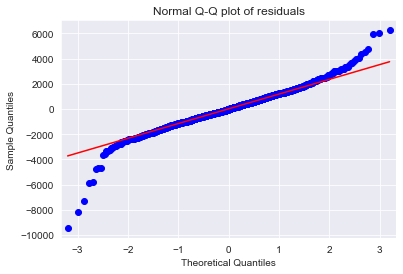

In [37]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [38]:
#list(np.where(final_ml_V.resid>10))

In [39]:
#plt.hist(final_ml_V.resid)

## Residual Plot for Homoscedasticity

In [40]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

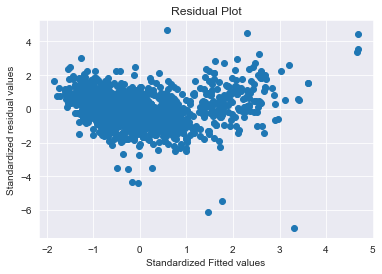

In [41]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

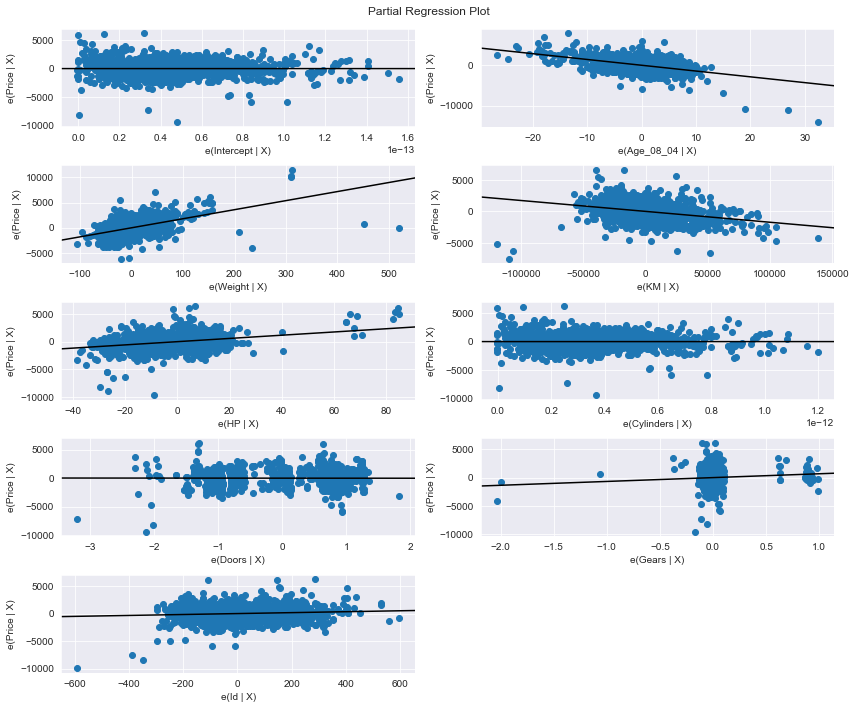

In [42]:
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

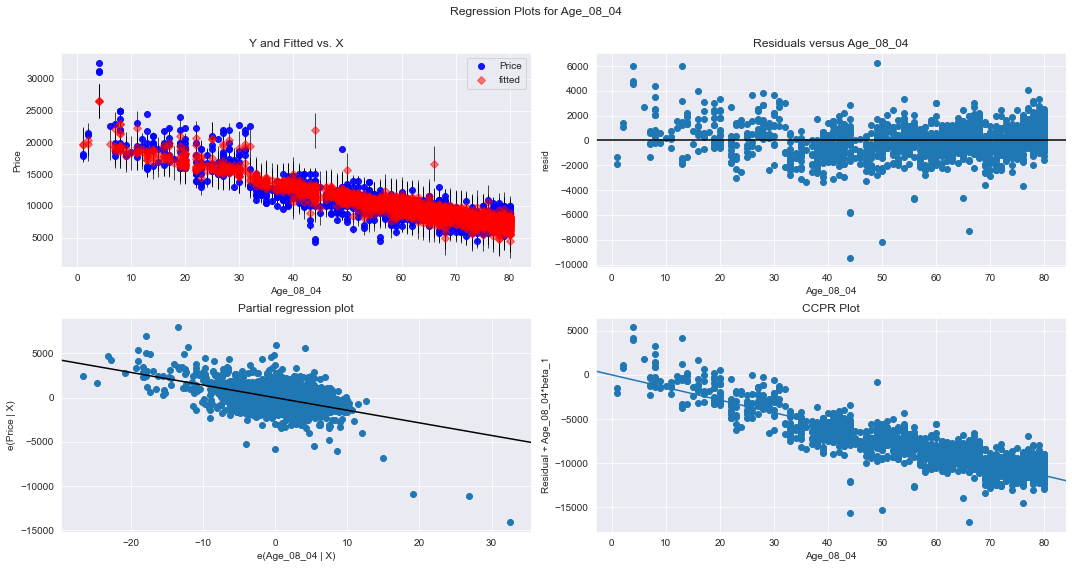

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

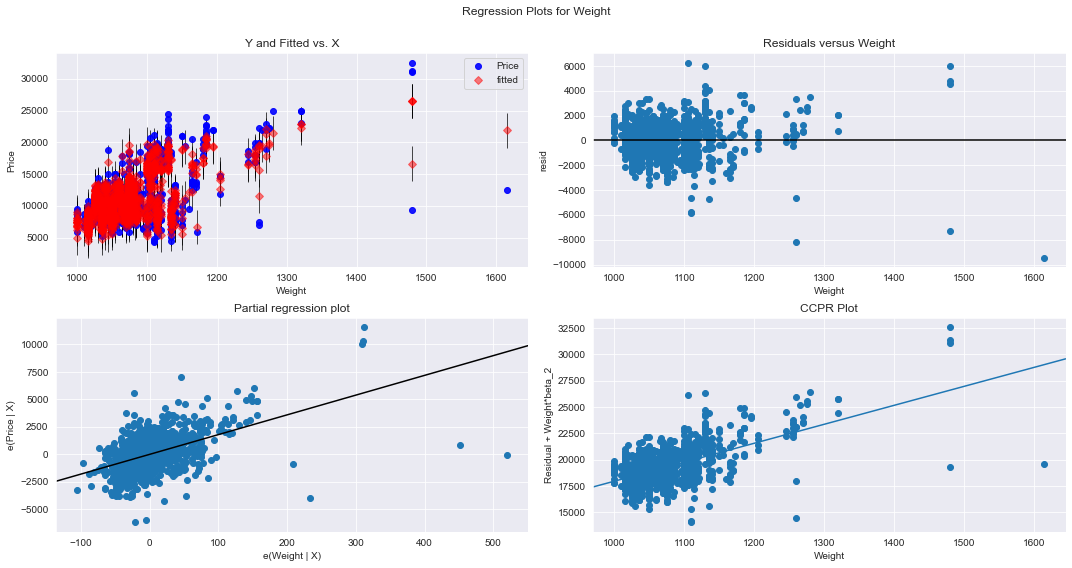

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

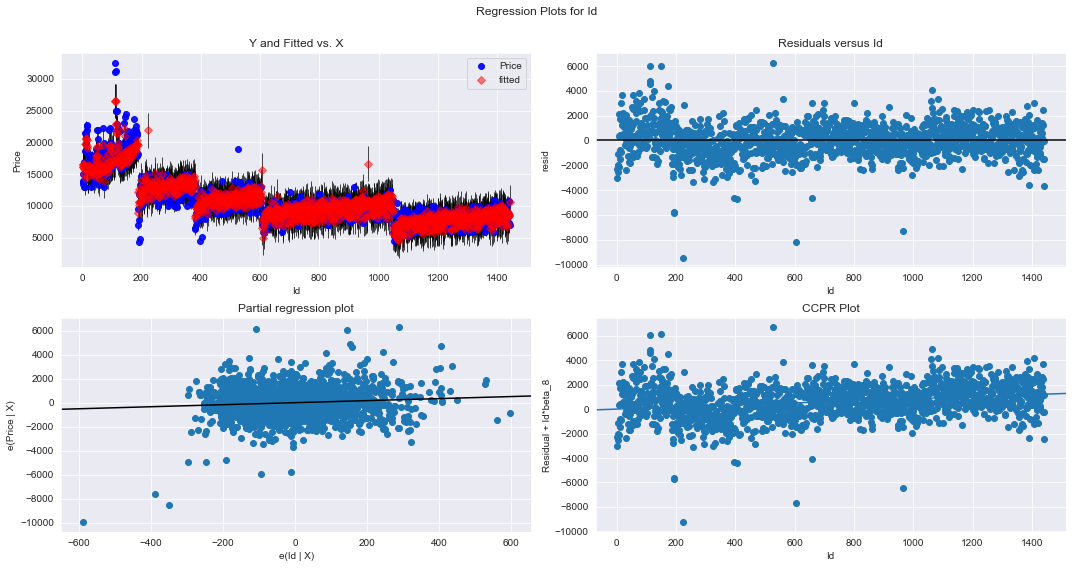

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Id", fig=fig)
plt.show()

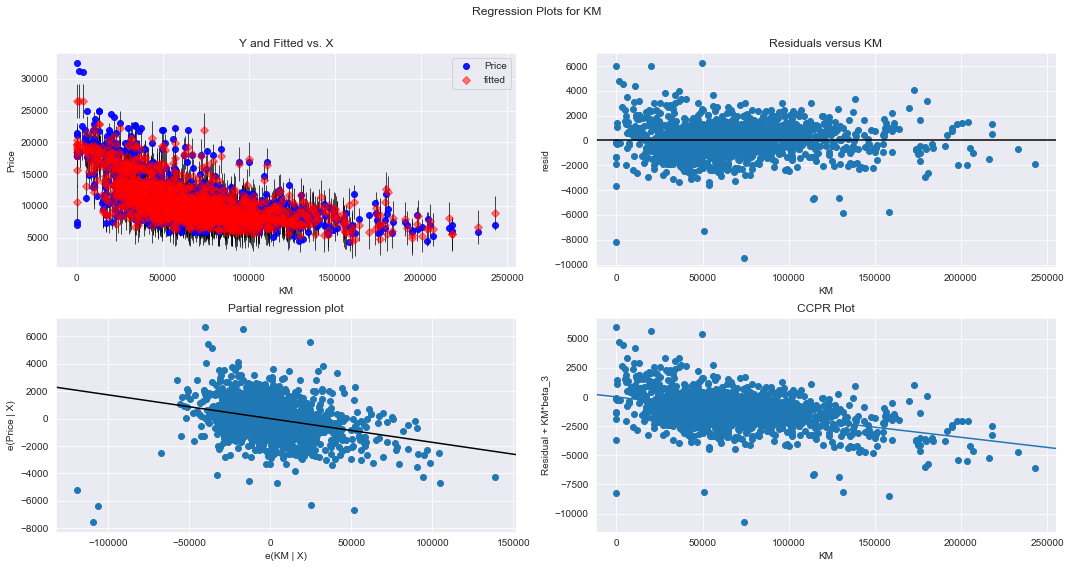

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

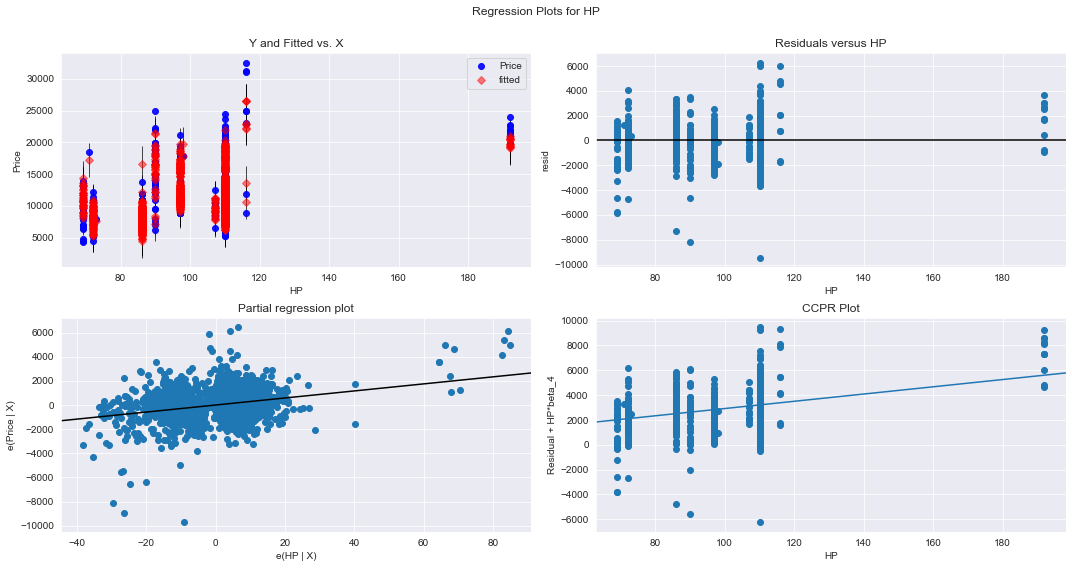

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

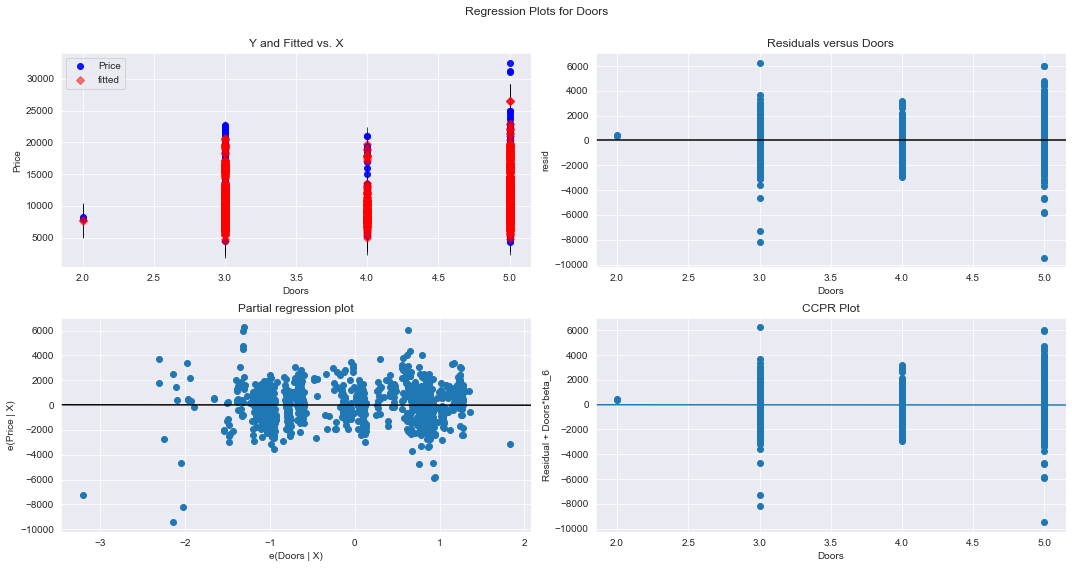

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

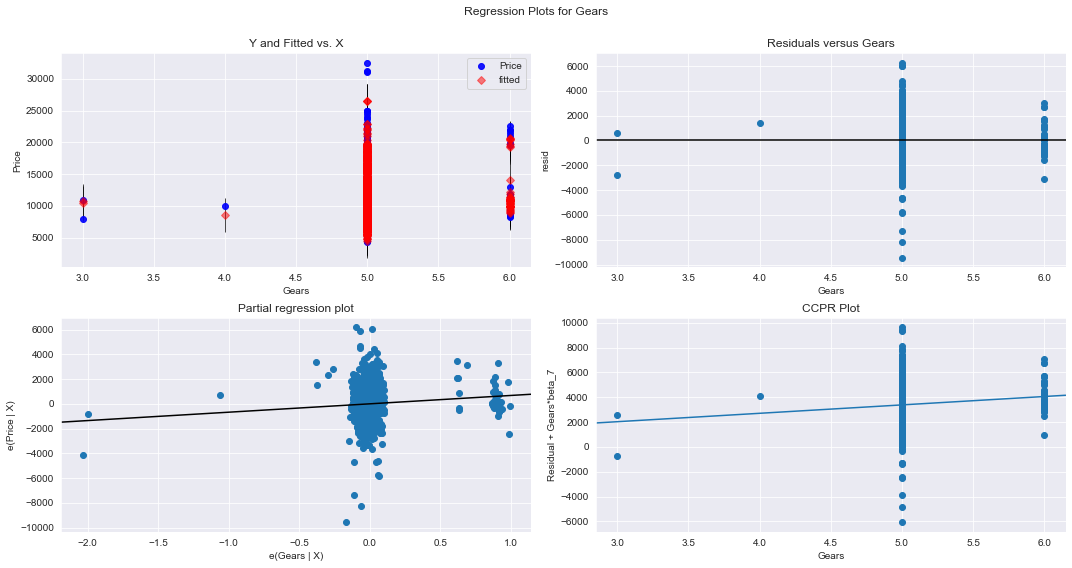

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

ValueError: specify slope and intercepty or model_results

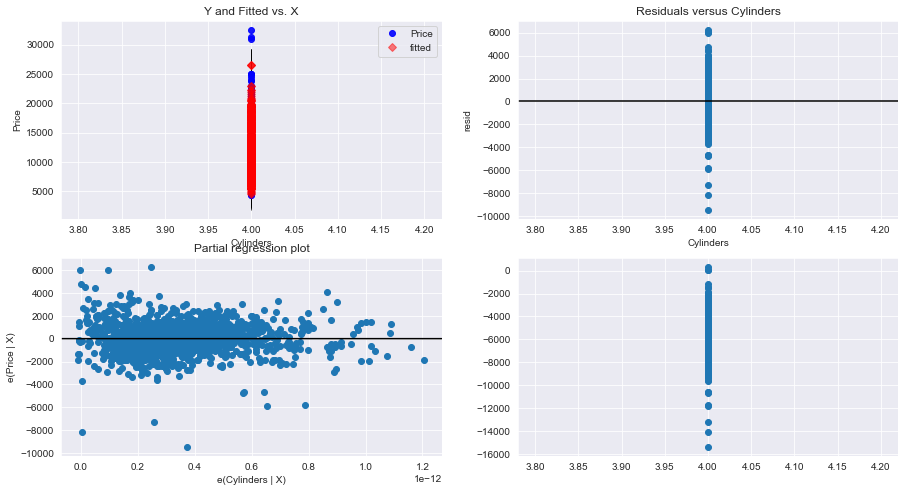

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Cylinders", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [51]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-52-24d3f9158356>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyota)), np.round(c, 3))


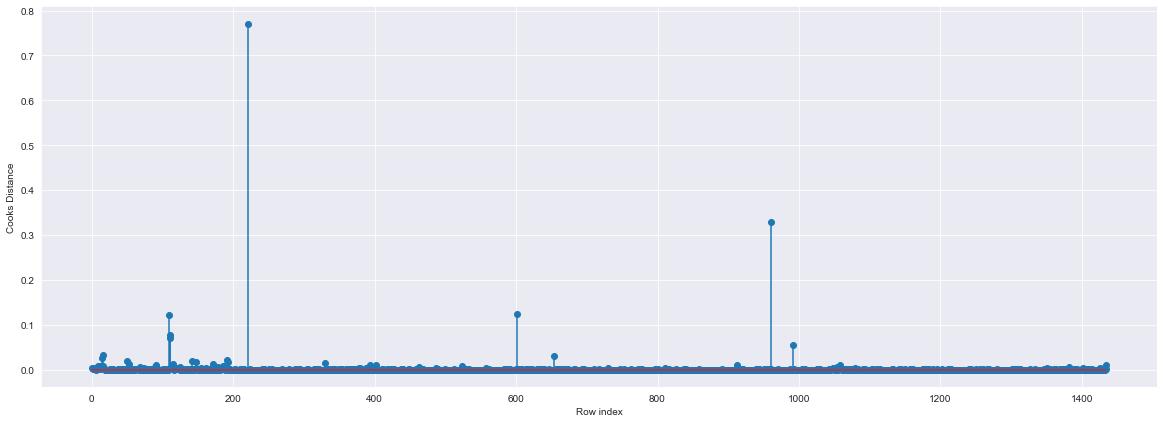

In [52]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.7709025434564318)

## High Influence points

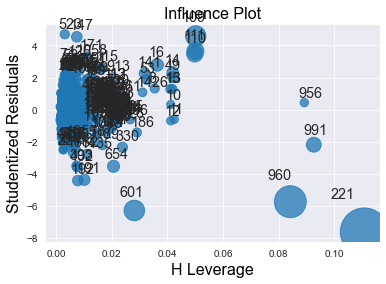

In [53]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [54]:
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02298050139275766

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [56]:
toyota[toyota.index.isin([70, 76])]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
70,71,TOYOTA Corolla 1.4 16V VVT I 5DR TERRA 4/5-Doors,15950,28,29206,97,5,4,5,1110
76,77,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,18750,31,25266,110,5,4,5,1130


In [57]:
#See the differences in HP and other variable values
toyota.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


# Improving the model

In [60]:
#Load the data
toyota_new = pd.read_csv("Toyota_Corolla.csv",encoding='cp1252')

In [61]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota1=toyota_new.drop(toyota_new.index[[70,76]],axis=0).reset_index()

In [62]:
#Drop the original index
toyota1=toyota1.drop(['index'],axis=1)

In [63]:
toyota1

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


# Build Model

In [64]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Cylinders+Doors+Gears',data = toyota1).fit()
#pred=final_ml_V.predict(car1)
#actual=car1.MPG
#errors=actual-pred
#errors.mean()
#rmse=np.sqrt(np.mean(errors**2))
#rmse

In [65]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1251.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:57:00   Log-Likelihood:                -12579.
No. Observations:                1434   AIC:                         2.517e+04
Df Residuals:                    1428   BIC:                         2.520e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    695.2142     68.998     10.076      0.000     559.866     830.562
Age_08_04   -152.3050      2.608    -58.400      0.000    -157.421    -147.189
KM            -0.0123      0.001     -9.146      0.000      -0.015      -0.010
HP            32.8450      3.029     10.843      0.000      26.903      38.787
Cylinders   2780.8568    275.991     10.076      0.000    2239.465    3322.249
Doors        221.8965     44.877      4.945      0.000     133.865     309.928
Gears        805.0591    229.134      3.513      0.000     355.583    1254.535
==============================================================================
Omnibus:                      425.098   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3230.480
Skew:                           1.167   Prob(JB):                         0.00
Kurtosis:                       9.973   Cond. No.                     4.43e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.46e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1296.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:57:05   Log-Likelihood:                -12374.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -371.1230     77.698     -4.776      0.000    -523.538    -218.708
Age_08_04   -142.8709      6.417    -22.264      0.000    -155.459    -130.283
Weight        17.9664      0.846     21.242      0.000      16.307      19.625
KM            -0.0173      0.001    -12.129      0.000      -0.020      -0.015
HP            29.1974      2.616     11.163      0.000      24.067      34.328
Cylinders  -1484.4922    310.793     -4.776      0.000   -2094.152    -874.833
Doors         -6.1918     39.846     -0.155      0.877     -84.355      71.971
Gears        676.7469    197.238      3.431      0.001     289.840    1063.654
Id             0.8460      0.240      3.518      0.000       0.374       1.318
==============================================================================
Omnibus:                      173.501   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1160.650
Skew:                          -0.334   Prob(JB):                    9.29e-253
Kurtosis:                       7.353   Cond. No.                     4.14e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8140801532507859, 25169.478513868864)

In [68]:
#Exclude variable "Age_08_04" and generate R-Squared and AIC values
final_ml_W= smf.ols('Price~Weight+Price+KM+HP+Cylinders+Doors+Gears',data = toyota1).fit()

In [69]:
(final_ml_W.rsquared,final_ml_W.aic)

(1.0, -71931.30770839301)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [70]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-71-dbf967b96a0e>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyota1)),np.round(c_V,3));


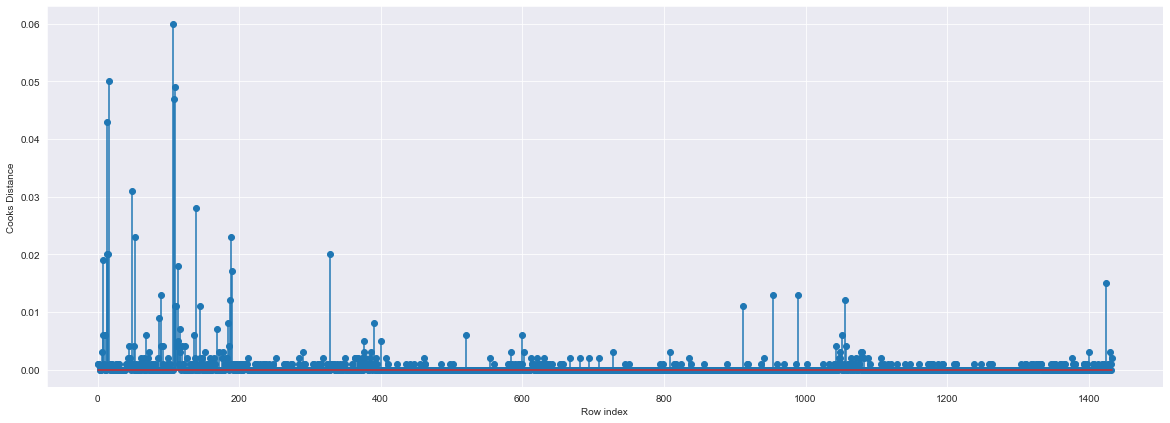

In [71]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [72]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(107, 0.06047130317766642)

In [73]:
#Drop 76 and 77 observations
toyota2=toyota1.drop(toyota1.index[[76,77]],axis=0)

In [74]:
toyota2

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [75]:
#Reset the index and re arrange the row values
toyota3=toyota2.reset_index()

In [76]:
toyota4=toyota3.drop(['index'],axis=1)

In [77]:
toyota4

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1428,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1429,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1430,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [78]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Weight+Id+Age_08_04+KM+HP+Doors+Cylinders+Gears',data = toyota4).fit()

In [79]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-80-ccd7b503d395>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyota4)),np.round(c_V,3));


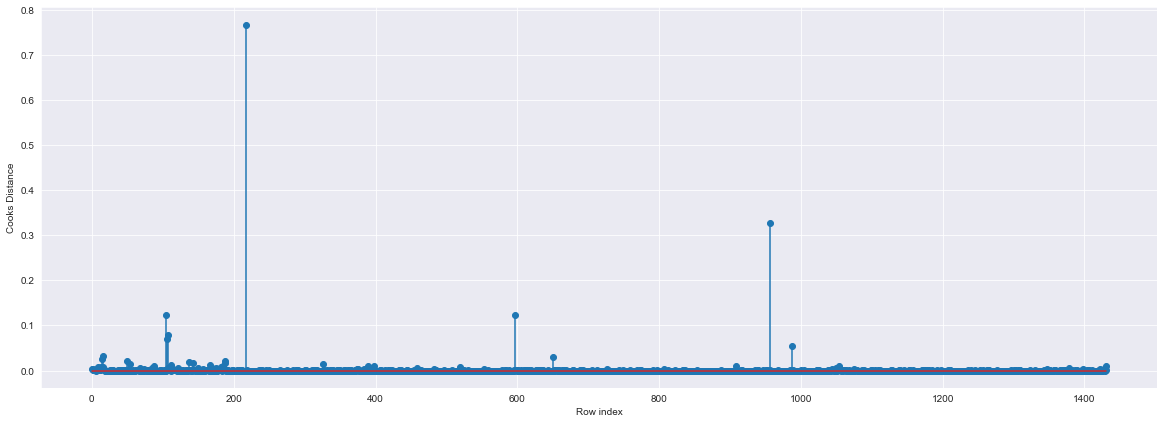

In [80]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [81]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(217, 0.7676369886197654)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [82]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Price~Weight+Id+Age_08_04+KM+HP+Doors+Cylinders+Gears',data = toyota4).fit()

In [83]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8634785582669341, 24693.891710121497)

## Predicting for new data

In [84]:
#New data for prediction
new_data=pd.DataFrame({'Price':13500,"Age_08_04":60,"Id":1400,"KM":46986,"HP":90,"Doors":3,"Cylinders":4,"Gears":5,"Weight":1165},index=[1])

In [85]:
final_ml_V.predict(new_data)

1    12421.223827
dtype: float64

In [86]:
final_ml_V.predict(toyota_new.iloc[0:5,])

0    16506.828777
1    16062.416375
2    16455.694659
3    16061.876016
4    15741.806929
dtype: float64

In [87]:
pred_y = final_ml_V.predict(toyota_new)

In [88]:
pred_y

0       16506.828777
1       16062.416375
2       16455.694659
3       16061.876016
4       15741.806929
            ...     
1431     8991.591719
1432     8409.564399
1433     8587.868983
1434     8733.846656
1435    10623.046770
Length: 1436, dtype: float64

In [89]:
# split the data into train and test

from sklearn.model_selection import train_test_split

train_data,test_data=train_test_split(toyota4,test_size=0.3)


In [90]:
train_data

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
1127,1137,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,9950,75,107000,110,3,4,5,1050
49,50,TOYOTA Corolla 1.8 16V VVTLI 5DR T SPORT 4/5-D...,21950,31,64982,192,5,4,6,1195
1150,1160,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,6490,80,100123,110,3,4,5,1050
205,211,TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors,11950,37,82743,110,5,4,5,1121
710,718,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,8450,68,90727,110,3,4,5,1050
...,...,...,...,...,...,...,...,...,...,...
109,115,TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV,24950,8,13253,116,5,4,5,1320
680,688,TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors,8950,68,101001,110,5,4,5,1075
1124,1134,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,7500,78,109263,110,5,4,5,1070
498,505,TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3...,9900,53,57475,110,3,4,5,1040


In [91]:
test_data

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
584,592,TOYOTA Corolla 1.4 HB LINEA TERRA 2/3-Doors,9950,48,28656,97,3,4,5,1085
470,477,TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-...,10450,48,64193,110,3,4,5,1040
1277,1288,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,7400,75,73460,110,5,4,5,1070
604,612,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,6900,65,176184,72,3,4,5,1115
622,630,TOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-D...,8950,58,133405,72,5,4,5,1135
...,...,...,...,...,...,...,...,...,...,...
500,507,TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3...,9475,48,56675,97,3,4,5,1025
919,927,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,8250,67,57000,110,3,4,5,1050
1146,1156,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,9500,79,100719,110,5,4,5,1070
568,576,TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3...,10950,56,35230,97,3,4,5,1025


In [92]:
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [93]:
#train the model using training data
train_model=smf.ols("Price~np.log(Id)+Weight+Age_08_04+KM+HP+Doors+Cylinders+Gears",data= train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=train_data.Price
errors_train=predtrain-actualtrain
rmse_train=RMSE(predtrain,actualtrain)
round(rmse_train,4)

1354.7492

In [94]:
predtest=train_model.predict(test_data)
actualtest=test_data.Price

rmse_test=RMSE(predtest,actualtest)
rmse_test

1308.011061765289